# Modelos QSAR-RF para protease principal 3C-like protease (M<sup>pro</sup>) de SARS-CoV

Os modelos nesse fluxo de trabalho foram criados usando as PaDEL-Descriptor, Impressões digitais de Morgan, SiRMS (Simplex Representation of Molecular Structure) e Drangon 7.0 com Random Forest scikit-learn.

## Importando Módulos e Funções

In [23]:
# Funções
from functions.BalanceBySim import *
from functions.DescritoresMorgan import morgan_descriptors
from functions.DescritoresPaDEL import padel_descriptors
from functions.DescritoresSiRMS import sirms_descriptors
from functions.DescritoresDragon import dragon_descriptors
from functions.stats import stats
from functions.RocAUC import roc_auc
from functions.YRandomization import y_randomization
from functions.BestModel import grid_search, random_search, best_grid_search, best_random_search
from functions.Evaluation import statistics
from functions.StatsChart import print_stats
from functions.CarregarDados import carregar_dados
from functions.Consenso import statistics_morganXpadel, statistics_sirmsXdragon
from functions.ConsensoChart import print_consenso
from functions.ComparisonHyperparameters import compare
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
import gzip
import _pickle as cPickle

## Carregar compostos inibidores (Y)

Original data:  (113, 11)
Dados mantidos:  (113, 11)
Forma do conjunto de treinamento:

		 Classe 1: 40
		 Classe 0: 73
		 Número total de compostos: 113
Class labels: [Counter({0: 73, 1: 40})]


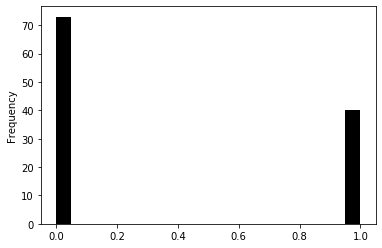

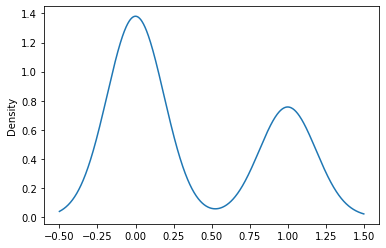

In [2]:
moldf = carregar_dados();
moldf.plot(kind="hist", legend=None, bins=20, color='k')
moldf.plot(kind="kde", legend=None);

## Gerando conjunto de treinamento e teste a partir dos descritores (X)

#### Função Fingerprints de Harry Morgan

In [25]:
data_morgan = morgan_descriptors(moldf)
Y_train_morgan = data_morgan['Y_train']
X_train_morgan = data_morgan['X_train']
X_train_morgan.shape

Forma do conjunto de treinamento:

		 Classe 1: 40
		 Classe 0: 73
		 Número total de compostos: 113
Class labels: [Counter({0: 73, 1: 40})]
Forma do conjunto de treinamento: Counter({0: 73, 1: 40})
Forma externa definida: Counter()


(113, 2048)

#### PaDEL-Descriptor

In [4]:
data_padel = padel_descriptors(moldf)
Y_train_padel = data_padel['Y_train']
X_train_padel = data_padel['X_train']
X_train_padel.shape

Forma do conjunto de treinamento: Counter({0: 73, 1: 40})
Forma externa definida: Counter()


(113, 1444)

#### SiRMS (Simplex Representation of Molecular Structure)

In [5]:
data_sirms = sirms_descriptors(moldf)
Y_train_sirms = data_sirms['Y_train']
X_train_sirms = data_sirms['X_train']
X_train_sirms.shape

(113, 1261)

#### Drangon 7.0

In [6]:
data_dragon = dragon_descriptors(moldf)
Y_train_dragon = data_dragon['Y_train']
X_train_dragon = data_dragon['X_train']
X_train_dragon.shape

(113, 377)

## Parâmetros p/ geração dos modelos

#### Parâmetros Random Forest 

In [7]:
from scipy.stats import expon, randint

balance_data = 'no'
if balance_data == 'yes':
    class_weight = [None]
else:
    class_weight = [None,'balanced',
                    {0:.9, 1:.1}, {0:.8, 1:.2}, {0:.7, 1:.3}, {0:.6, 1:.4},
                    {0:.4, 1:.6}, {0:.3, 1:.7}, {0:.2, 1:.8}, {0:.1, 1:.9}]

# Grade de parametros
rf_param = {
    "n_estimators": [100, 250, 500, 750, 1000],
    "max_features": ['auto', 'sqrt'],
    "criterion": ['gini', 'entropy'],
    "random_state": [24],
    "class_weight": class_weight,
}

# Distribuição de parametros
rf_dist = {
    "n_estimators": randint(100,1000),
    "max_features": ['auto', 'sqrt'],
    "criterion": ['gini', 'entropy'],
    "random_state": [24],
    "class_weight": class_weight
}

## Otimizando hiperparâmetros

#### Morgan

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  6.5min finished


**Resultados Grid Search**
Melhores Parâmetros: {'class_weight': None, 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 750, 'random_state': 24}
Melhor precisão de treinamento:	 0.8237154150197629
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  1.6min finished


**Resultados Random Search**
Melhores Parâmetros: {'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 683, 'random_state': 24}
Melhor precisão de treinamento:	 0.8237154150197629


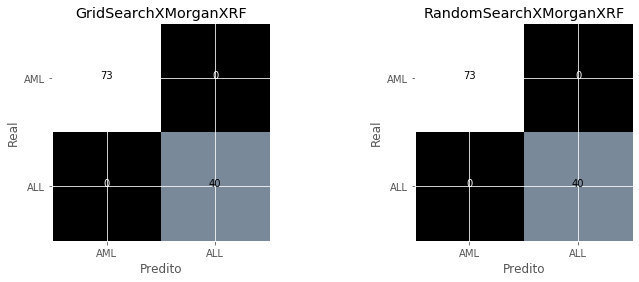

In [26]:
compare(RandomForestClassifier(), X_train_morgan, Y_train_morgan, rf_param, rf_dist, 'Morgan', 'RF')

#### Sirms

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  6.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


**Resultados Grid Search**
Melhores Parâmetros: {'class_weight': {0: 0.6, 1: 0.4}, 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100, 'random_state': 24}
Melhor precisão de treinamento:	 0.7893280632411067
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  1.6min finished


**Resultados Random Search**
Melhores Parâmetros: {'class_weight': {0: 0.6, 1: 0.4}, 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 352, 'random_state': 24}
Melhor precisão de treinamento:	 0.7798418972332016


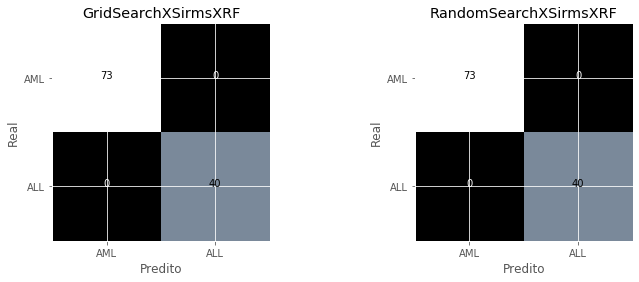

In [27]:
compare(RandomForestClassifier(), X_train_sirms, Y_train_sirms, rf_param, rf_dist, 'Sirms', 'RF')

#### Dragon

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  6.2min finished


**Resultados Grid Search**
Melhores Parâmetros: {'class_weight': {0: 0.4, 1: 0.6}, 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 250, 'random_state': 24}
Melhor precisão de treinamento:	 0.7624505928853755
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  1.6min finished


**Resultados Random Search**
Melhores Parâmetros: {'class_weight': {0: 0.6, 1: 0.4}, 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 172, 'random_state': 24}
Melhor precisão de treinamento:	 0.7624505928853755


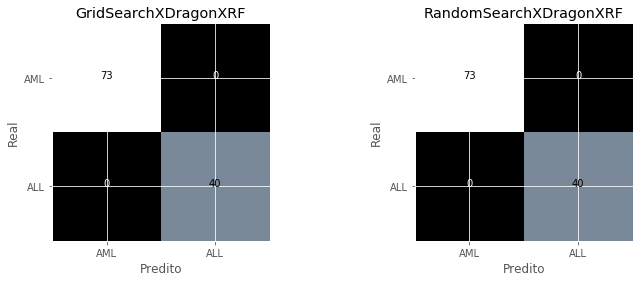

In [28]:
compare(RandomForestClassifier(), X_train_dragon, Y_train_dragon, rf_param, rf_dist, 'Dragon', 'RF')

#### Padel

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  7.6min finished


**Resultados Grid Search**
Melhores Parâmetros: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 1000, 'random_state': 24}
Melhor precisão de treinamento:	 0.7802371541501977
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  1.9min finished


**Resultados Random Search**
Melhores Parâmetros: {'class_weight': {0: 0.3, 1: 0.7}, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 343, 'random_state': 24}
Melhor precisão de treinamento:	 0.7802371541501977


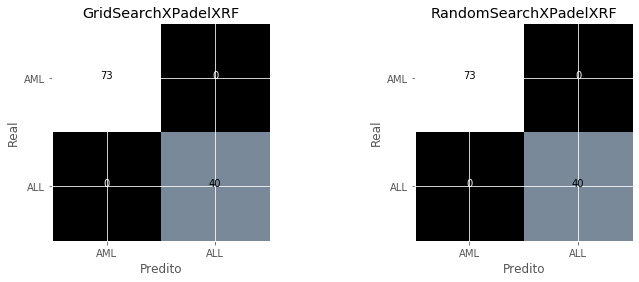

In [29]:
compare(RandomForestClassifier(), X_train_padel, Y_train_padel, rf_param, rf_dist, 'Padel', 'RF')

#### Criando modelos a partir dos  melhores parâmetros

In [8]:
#criando o modelo com os melhores parametros utilizando processamento paralelo

#{'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 683, 'random_state': 24}
rf_best_morgan = RandomForestClassifier(class_weight=None, criterion='gini', max_features='sqrt', n_estimators=683, random_state=24,  n_jobs=-1)

#{'class_weight': {0: 0.6, 1: 0.4}, 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 352, 'random_state': 24}
rf_best_sirms = RandomForestClassifier(class_weight={0: 0.6, 1: 0.4}, criterion='gini',max_features='auto', n_estimators=352, random_state=24, n_jobs=-1)

#{'class_weight': {0: 0.4, 1: 0.6}, 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 250, 'random_state': 24}
rf_best_dragon = RandomForestClassifier(class_weight={0: 0.6, 1: 0.4},criterion='entropy', max_features='auto', n_estimators=172, random_state=24, n_jobs=-1)

#{'class_weight': {0: 0.3, 1: 0.7}, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 343, 'random_state': 24}
rf_best_padel = RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy', max_features='sqrt', n_estimators=343, random_state=24, n_jobs=-1)

#Construa uma floresta de árvores a partir do conjunto de treinamento (X, y)
rf_best_morgan.fit(X_train_morgan, Y_train_morgan)
rf_best_sirms.fit(X_train_sirms, Y_train_sirms)
rf_best_dragon.fit(X_train_dragon, Y_train_dragon)
rf_best_padel.fit(X_train_padel, Y_train_padel)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=343, n_jobs=-1, oob_score=False,
                       random_state=24, verbose=0, warm_start=False)

## Validação dos modelos

####  Área sob a curva ROC (AUC) 

In [9]:
cross_val = StratifiedKFold(n_splits=5)

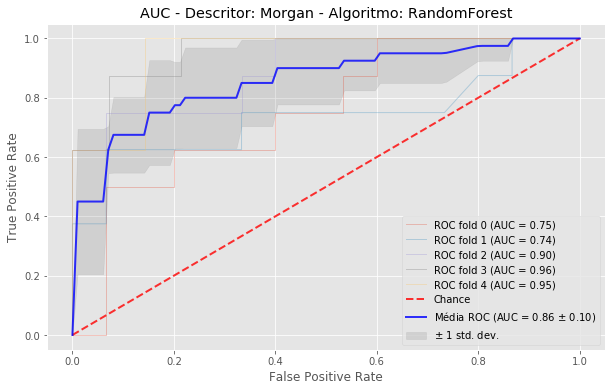

In [30]:
roc_auc(rf_best_morgan, cross_val, X_train_morgan, Y_train_morgan, 'Morgan', 'RandomForest')

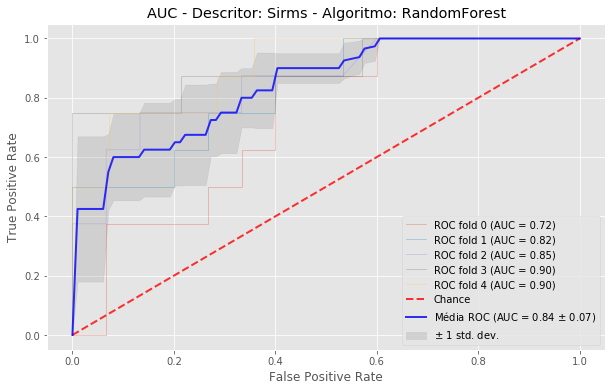

In [31]:
roc_auc(rf_best_sirms, cross_val, X_train_sirms, Y_train_sirms, 'Sirms', 'RandomForest')

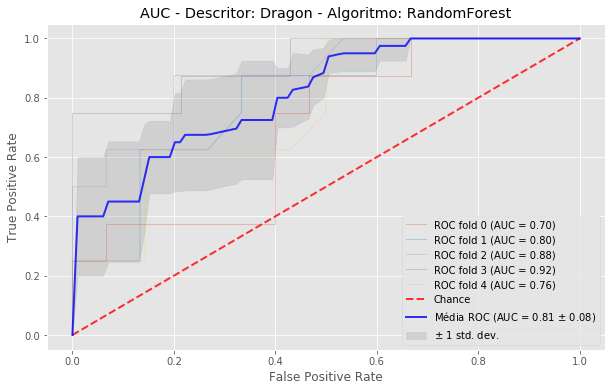

In [32]:
roc_auc(rf_best_dragon, cross_val, X_train_dragon, Y_train_dragon, 'Dragon', 'RandomForest')

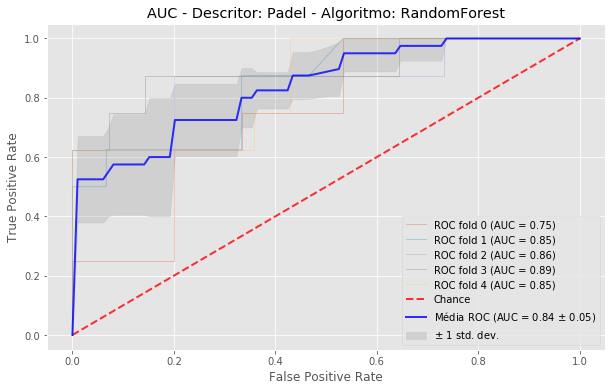

In [33]:
roc_auc(rf_best_padel, cross_val, X_train_padel, Y_train_padel, 'Padel', 'RandomForest')

####  Estatisiticas e AD

In [10]:
data_stats_morgan = statistics(rf_best_morgan, X_train_morgan, Y_train_morgan, cross_val, data_morgan['moldf_desc'], data_morgan['moldf_train'], 'Morgan_RF')
stats_morgan = data_stats_morgan['stats']
five_fold_morgan = data_stats_morgan['five_fold']
stats_morgan

C:\Users\Renata\Desktop\PROJETO\procedimentos\functions\Evaluation.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_fold_descritor.AD[five_fold_descritor.AD == 'False'] = np.nan
C:\Users\Renata\Desktop\PROJETO\procedimentos\functions\Evaluation.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_fold_descritor.AD[five_fold_descritor.AD == 'True'] = five_fold_descritor.Prediction


,Kappa,AUC,Sensibilidade,PPV,Especificidade,NPV,Acurácia,F1 Score,Coverage
Morgan_RF,0.59,0.78,0.65,0.81,0.92,0.83,0.82,0.72,1.0
Morgan_RF AD,0.64,0.79,0.60,0.94,0.98,0.84,0.86,0.73,0.7


In [11]:
data_stats_sirms = statistics(rf_best_sirms, X_train_sirms, Y_train_sirms, cross_val, data_sirms['moldf_desc'], data_sirms['moldf_train'], 'Sirms_RF')
stats_sirms = data_stats_sirms['stats']
five_fold_sirms = data_stats_sirms['five_fold']
stats_sirms

C:\Users\Renata\Desktop\PROJETO\procedimentos\functions\Evaluation.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_fold_descritor.AD[five_fold_descritor.AD == 'False'] = np.nan
C:\Users\Renata\Desktop\PROJETO\procedimentos\functions\Evaluation.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_fold_descritor.AD[five_fold_descritor.AD == 'True'] = five_fold_descritor.Prediction


,Kappa,AUC,Sensibilidade,PPV,Especificidade,NPV,Acurácia,F1 Score,Coverage
Sirms_RF,0.50,0.74,0.60,0.73,0.88,0.80,0.78,0.66,1.00
Sirms_RF AD,0.67,0.82,0.71,0.85,0.93,0.86,0.86,0.77,0.62


In [12]:
data_stats_dragon = statistics(rf_best_dragon, X_train_dragon, Y_train_dragon, cross_val, data_dragon['moldf_desc'], data_dragon['moldf_train'], 'Dragon_RF')
stats_dragon = data_stats_dragon['stats']
five_fold_dragon = data_stats_dragon['five_fold']
stats_dragon

C:\Users\Renata\Desktop\PROJETO\procedimentos\functions\Evaluation.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_fold_descritor.AD[five_fold_descritor.AD == 'False'] = np.nan
C:\Users\Renata\Desktop\PROJETO\procedimentos\functions\Evaluation.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_fold_descritor.AD[five_fold_descritor.AD == 'True'] = five_fold_descritor.Prediction


,Kappa,AUC,Sensibilidade,PPV,Especificidade,NPV,Acurácia,F1 Score,Coverage
Dragon_RF,0.46,0.72,0.60,0.69,0.85,0.79,0.76,0.64,1.00
Dragon_RF AD,0.62,0.78,0.61,0.85,0.96,0.87,0.86,0.71,0.58


In [13]:
data_stats_padel = statistics(rf_best_padel, X_train_padel, Y_train_padel, cross_val, data_padel['moldf_desc'], data_padel['moldf_train'], 'Padel_RF')
stats_padel = data_stats_padel['stats']
five_fold_padel = data_stats_padel['five_fold']
stats_padel

C:\Users\Renata\Desktop\PROJETO\procedimentos\functions\Evaluation.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_fold_descritor.AD[five_fold_descritor.AD == 'False'] = np.nan
C:\Users\Renata\Desktop\PROJETO\procedimentos\functions\Evaluation.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_fold_descritor.AD[five_fold_descritor.AD == 'True'] = five_fold_descritor.Prediction


,Kappa,AUC,Sensibilidade,PPV,Especificidade,NPV,Acurácia,F1 Score,Coverage
Padel_RF,0.50,0.74,0.60,0.73,0.88,0.80,0.78,0.66,1.00
Padel_RF AD,0.59,0.76,0.53,0.89,0.98,0.87,0.87,0.67,0.54


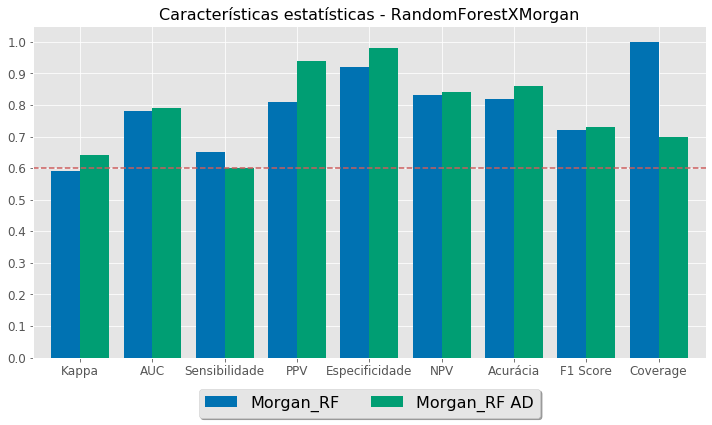

In [34]:
print_stats(stats_morgan, 'Morgan', 'RandomForest')

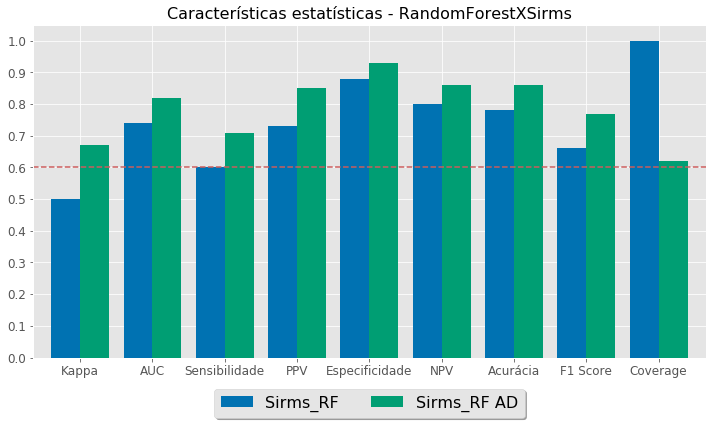

In [35]:
print_stats(stats_sirms, 'Sirms', 'RandomForest')

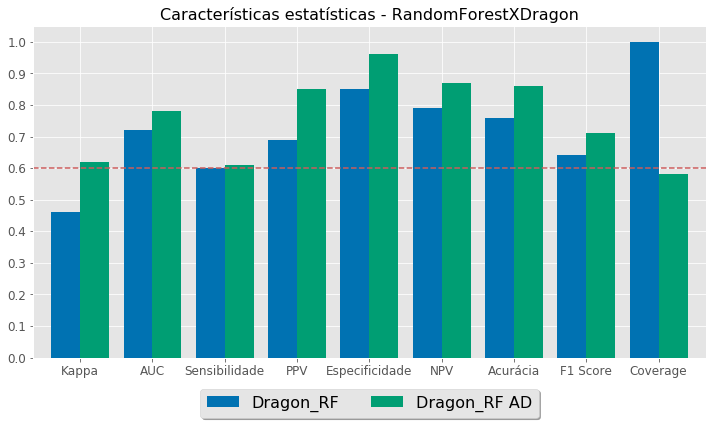

In [36]:
print_stats(stats_dragon, 'Dragon', 'RandomForest')

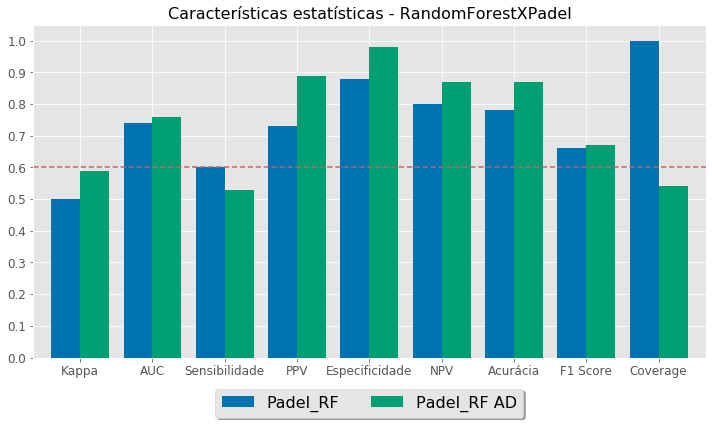

In [37]:
print_stats(stats_padel, 'Padel', 'RandomForest')

#### Y-randomization

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   54.9s finished


True score =  0.78 
 Média per. =  0.5 
p-value =  0.0476


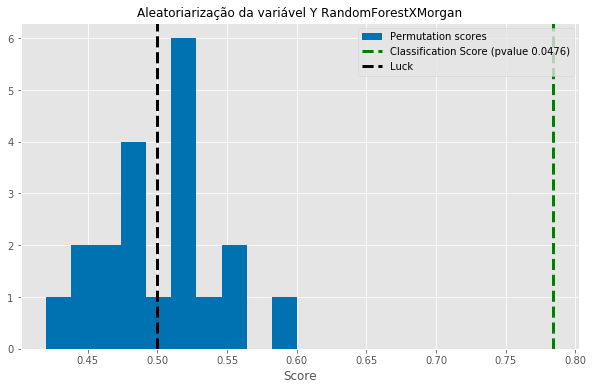

In [38]:
y_randomization(rf_best_morgan, X_train_morgan, Y_train_morgan, 'Morgan', 'RandomForest')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   28.9s finished


True score =  0.74 
 Média per. =  0.49 
p-value =  0.0476


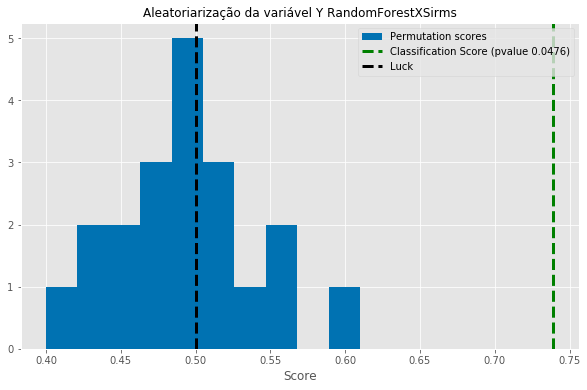

In [39]:
y_randomization(rf_best_sirms, X_train_sirms, Y_train_sirms, 'Sirms', 'RandomForest')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   14.8s finished


True score =  0.73 
 Média per. =  0.5 
p-value =  0.0476


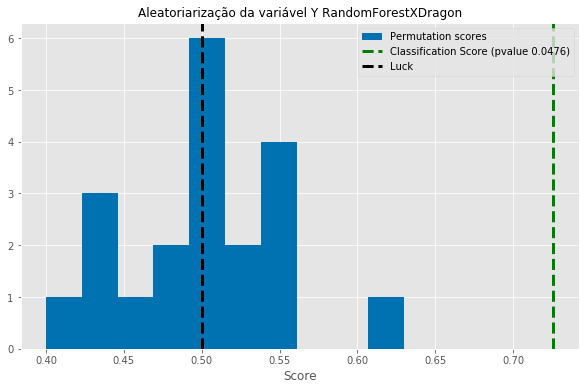

In [40]:
y_randomization(rf_best_dragon, X_train_dragon, Y_train_dragon, 'Dragon', 'RandomForest')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   36.1s finished


True score =  0.74 
 Média per. =  0.5 
p-value =  0.0476


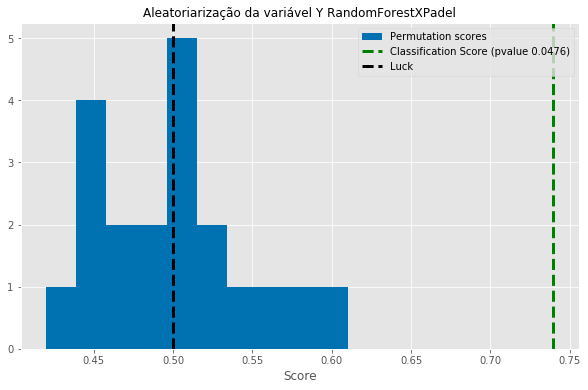

In [41]:
y_randomization(rf_best_padel, X_train_padel, Y_train_padel, 'Padel', 'RandomForest')

## Consenso

#### Obter consenso

In [15]:
stats_morganXpadel = statistics_morganXpadel(moldf, data_dragon['moldf_train'], five_fold_morgan, five_fold_padel)
stats_morganXpadel

,Kappa,AUC,Sensibilidade,PPV,Especificidade,NPV,Acurácia,F1 Score,Coverage
Morgan,0.64,0.79,0.60,0.94,0.98,0.84,0.86,0.73,0.70
PaDEL,0.59,0.76,0.53,0.89,0.98,0.87,0.87,0.67,0.54
Consensus,0.56,0.75,0.55,0.88,0.96,0.80,0.81,0.68,1.00
Consensus (AD),0.63,0.79,0.62,0.89,0.97,0.85,0.86,0.73,0.74
Consensus (Rigor),0.60,0.75,0.50,1.00,1.00,0.86,0.88,0.67,0.50


In [16]:
stats_sirmsXdragon = statistics_sirmsXdragon(moldf, data_dragon['moldf_train'], five_fold_sirms, five_fold_dragon)
stats_sirmsXdragon

,Kappa,AUC,Sensibilidade,PPV,Especificidade,NPV,Acurácia,F1 Score,Coverage
SiRMS,0.67,0.82,0.71,0.85,0.93,0.86,0.86,0.77,0.62
Dragon,0.62,0.78,0.61,0.85,0.96,0.87,0.86,0.71,0.58
Consensus,0.51,0.74,0.57,0.77,0.90,0.80,0.79,0.66,1.00
Consensus (AD),0.61,0.79,0.65,0.81,0.93,0.85,0.84,0.72,0.72
Consensus (Rigor),0.71,0.83,0.69,0.92,0.97,0.88,0.89,0.79,0.48


#### Plotar consenso

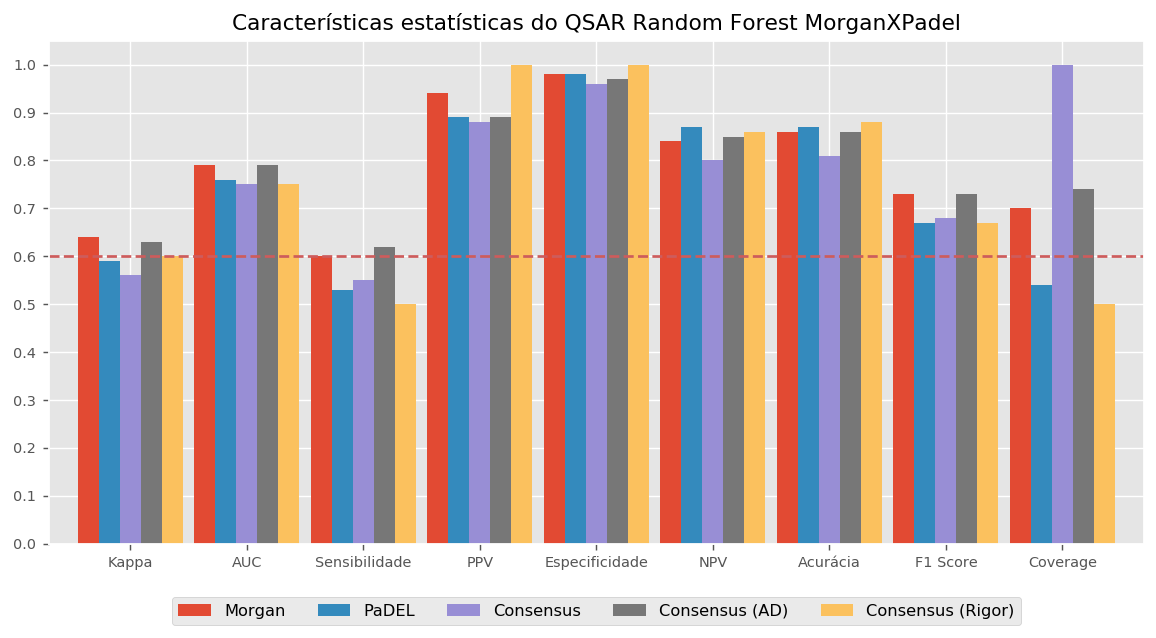

In [18]:
print_consenso(stats_morganXpadel, 'Random Forest','MorganXPadel')

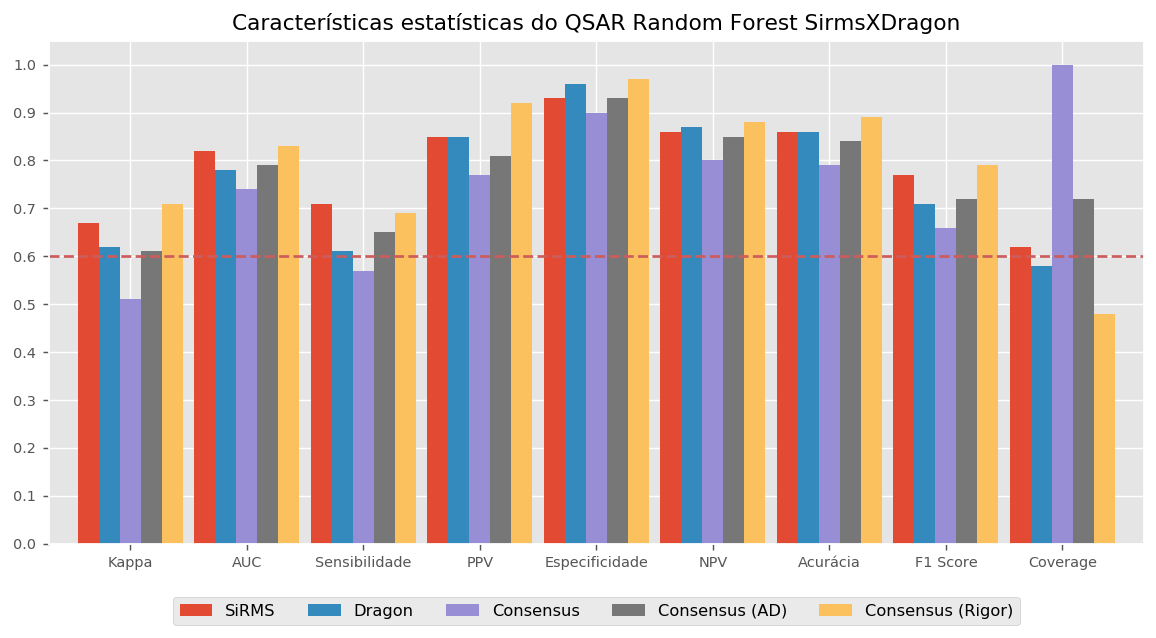

In [19]:
print_consenso(stats_sirmsXdragon, 'Random Forest','SirmsXDragon')

## Salvar modelos

In [24]:
with gzip.GzipFile('model/sars-cov-3clpro-morgan_RF_ad_balanced.pgz', 'w') as f:
    cPickle.dump(rf_best_morgan, f)
with gzip.GzipFile('model/sars-cov-3clpro-sirms_RF_ad_balanced.pgz', 'w') as f:
    cPickle.dump(rf_best_sirms, f)
with gzip.GzipFile('model/sars-cov-3clpro-dragon_RF_ad_balanced.pgz', 'w') as f:
    cPickle.dump(rf_best_dragon, f)
with gzip.GzipFile('model/sars-cov-3clpro-padel_RF_ad_balanced.pgz', 'w') as f:
    cPickle.dump(rf_best_padel, f)